# Data Initialization

## Data Processing and Visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.core.debugger import set_trace
from scipy.io import arff
import urllib.request
import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

#it is important to set the seed for reproducibility as it initializes the random number generator
np.random.seed(1234)

### Data Import

#### Hepatitis
I first import the [hepatitis.data CSV file](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data) directly from the URL, and include the headers as described in the [hepatitis.names file](http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names) from the same folder.

In [2]:
# Visit http://archive.ics.uci.edu/ml/datasets/Hepatitis for the full folder.
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
headers = ['CLASS', 'AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

#generate the dataframe
df = pd.read_csv(url, delimiter=',',names = headers)

# store total entries before cleaning
numentries_before = df.shape[0]

#### Diabetes
Next I import the [messidor_features.arff](https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff) in a similar way, and process the data to make a workable dataframe.

In [3]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
headers = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','CLASS']
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

# generate the dataframe
df2 = pd.DataFrame(data = data, columns= headers).drop(["CLASS"],axis=1)

# - we reinsert the target column by decoding the corresponding values in "data" back into the dataframe
df2["CLASS"] = np.zeros(df2.shape[0])
for i in range(0, data.shape[0]):
  df2.at[i,"CLASS"] = data[i][19].decode('UTF-8')

# Add one to all binary categorical values to maintain consistency of value meanings between the Diabetes dataset and Hepatitis data set.
df2[["0","1","18","CLASS"]] += 1

# store total entries before cleaning
numentries2_before = df2.shape[0]

### Data Cleaning
I purge the data that have invalid or missing information in their columns.

#### Hepatitis
I remove all the rows with "?" in their values before typecasting the columns appropriately.

In [4]:
#for df
# we drop all the rows that have '?' in their column values
df.replace("?", float("NaN"), inplace=True)
df.dropna(inplace=True)

# After all '?' has been cleared out, we may appropriately retype each column.
df = df.astype({
              "CLASS":"int64", \
              "AGE":"float", \
              "SEX":"int64", \
              "STEROID":"int64", \
              "ANTIVIRALS":"int64",\
              "FATIGUE":"int64", \
              "MALAISE":"int64", \
              "ANOREXIA":"int64", \
              "LIVER BIG":"int64", \
              "LIVER FIRM":"int64",\
              "SPLEEN PALPABLE":"int64", \
              "SPIDERS":"int64", \
              "ASCITES":"int64", \
              "VARICES":"int64", \
              "BILIRUBIN":"float", \
              "ALK PHOSPHATE":"float", \
              "SGOT":"float", \
              "ALBUMIN":"float", \
              "PROTIME":"float", \
              "HISTOLOGY":"int64"
             })

# store total entries after cleaning
numentries_after = df.shape[0]

#print info
print(f"Total entries before cleaning: {numentries_before}")
print(f"Total Entries after cleaning: {numentries_after}")
print(f"Entries removed: {numentries_before-numentries_after}")

Total entries before cleaning: 155
Total Entries after cleaning: 80
Entries removed: 75


#### Diabetes
There's no missing data so I just typecast each column appropriately.

In [5]:
#0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
##1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
#2-7) The results of MA detection. Each feature value stand for the
#number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
#8-15) contain the same information as 2-7) for exudates. However,
#as exudates are represented by a set of points rather than the number of
#pixels constructing the lesions, these features are normalized by dividing the
#number of lesions with the diameter of the ROI to compensate different image
#sizes.
#16) The euclidean distance of the center of
#the macula and the center of the optic disc to provide important information
#regarding the patientâ€™s condition. This feature
#is also normalized with the diameter of the ROI.
#17) The diameter of the optic disc.
#18) The binary result of the AM/FM-based classification.
#19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.
#Dataset 2: messidor features.arff (Diabetic Retinopathy Debrecen dataset):
df2 = df2.astype({
              "0":"int64", \
              "1":"int64", \
              "2":"float", \
              "3":"float",\
              "4":"float", \
              "5":"float", \
              "6":"float", \
              "7":"float", \
              "8":"float",\
              "9":"float", \
              "10":"float", \
              "11":"float", \
              "12":"float", \
              "13":"float", \
              "14":"float", \
              "15":"float", \
              "16":"float", \
              "17":"float", \
              "18":"int64", \
              "CLASS":"int64"
             })

# store total entries after cleaning
numentries2_after = df2.shape[0]

#print info
print(f"Total entries before cleaning: {numentries2_before}")
print(f"Total Entries after cleaning: {numentries2_after}")
print(f"Entries removed: {numentries2_before-numentries2_after}")

Total entries before cleaning: 1151
Total Entries after cleaning: 1151
Entries removed: 0


### Data Splitting
Here, I split the data into training and testing.

####Hepatitis


In [6]:
# We first split the data into features and targets.
negative_hep = sum(df["CLASS"] == 2) #determine class distribution
positive_hep = sum(df["CLASS"] == 1)
print(f'Positive entries: {positive_hep} \nNegative entries: {negative_hep}')
x, y = df.drop(columns=['CLASS']), df['CLASS']
(N,D), C = x.shape, np.max(y)

print(f' instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# Now we split up the features and target into their respective training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 40, shuffle=True)

Positive entries: 13 
Negative entries: 67
 instances (N) 	 80 
 features (D) 	 19 
 classes (C) 	 2


####Diabetes


In [7]:
#split data for df2
#same procedure as above for df
negative_diab = sum(df2["CLASS"] == 1) #determine class distribution
positive_diab = sum(df2["CLASS"] == 2)
print(f'Positive entries: {positive_diab} \nNegative entries: {negative_diab}')
x2, y2 = df2.drop(columns=['CLASS']), df2['CLASS']
(N2,D2), C2 = x2.shape, np.max(y2)

print(f' instances (N) \t {N2} \n features (D) \t {D2} \n classes (C) \t {C2}')

# Now we split up the features and target into their respective training and testing data.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.33, random_state = 40, shuffle=True)

Positive entries: 611 
Negative entries: 540
 instances (N) 	 1151 
 features (D) 	 19 
 classes (C) 	 2


### Data Visualization
For both datasets, I first find out the 2 most correlated *numerical* features to the target before plotting them out on a 2D graph. I do so hoping to see if there's anything visually interesting about the data.

####Hepatitis

In [8]:
# We evaluate the correlation of each feature with the target (CLASS)
df.corr(min_periods=10)["CLASS"].sort_values()

HISTOLOGY         -0.456856
BILIRUBIN         -0.351557
AGE               -0.212769
LIVER BIG         -0.194030
ALK PHOSPHATE     -0.189360
ANOREXIA          -0.185042
ANTIVIRALS        -0.108776
LIVER FIRM         0.055978
SGOT               0.078731
STEROID            0.123830
SPLEEN PALPABLE    0.135643
SEX                0.175876
FATIGUE            0.181151
MALAISE            0.275595
SPIDERS            0.287839
VARICES            0.345785
PROTIME            0.395386
ALBUMIN            0.477404
ASCITES            0.479211
CLASS              1.000000
Name: CLASS, dtype: float64

From the information above, we see the 2 numerical features with the highest absolute value for correlation are **albumin** and **protime**.

So, I plot it out below: 

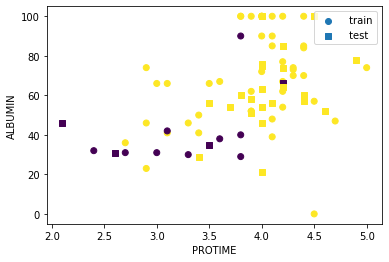

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(x_train.values[:,16], x_train.values[:,17], c=y_train.values, marker= 'o', label = ' train')
plt.scatter(x_test.values[:,16], x_test.values[:,17], c=y_test.values, marker= 's', label = ' test')
plt.legend()
plt.ylabel('ALBUMIN')
plt.xlabel('PROTIME')
plt.show()
plt.savefig('2D-albumin-protime.png', dpi=300)

####Diabetes


In [10]:
# We evaluate the correlation of each feature with the target (CLASS) for df2
df2.corr(min_periods=10)["CLASS"].sort_values()

1       -0.076925
18      -0.042144
17      -0.030868
9        0.000479
16       0.008466
10       0.038281
8        0.058015
0        0.062816
11       0.104254
7        0.127861
12       0.142273
13       0.151424
6        0.161631
15       0.177313
14       0.184772
5        0.197511
4        0.234691
3        0.266338
2        0.292603
CLASS    1.000000
Name: CLASS, dtype: float64

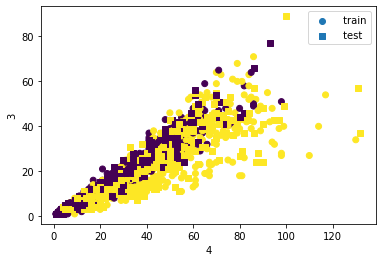

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(x2_train.values[:,3], x2_train.values[:,7], c=y2_train.values, marker= 'o', label = ' train')
plt.scatter(x2_test.values[:,3], x2_test.values[:,7], c=y2_test.values, marker= 's', label = ' test')
plt.legend()
plt.ylabel('3')
plt.xlabel('4')
plt.show()
plt.savefig('2D-3-4.png', dpi=300)

# K-Nearest Neighbours

## The KNN Class

In [12]:
#We first define some basic distance equations to measure similarity. 
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
euclidean.__name__ = 'euclidean'
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
manhattan.__name__ = 'manhattan'
hamming = lambda x1, x2: np.sum((x1==x2).astype(int), axis=-1)
hamming.__name__ = 'hamming'

#We also define a row_style function to highlight the predicted values that are mismatched with their actual values.
def row_style(row):
  if row.Predict == row.Actual:
    return pd.Series('background-color: green', row.index)
  else:
    return pd.Series('background-color: red', row.index)

### KNN Class

I implement the model as a python classes. Two class methods that we usually 
need to implement are fit and predict; which respectively perform training by fitting the data, and making predictions on new data.


In [13]:
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y)
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        self.knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        self.y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            self.knns[i,:] = np.argsort(distances[i])[:self.K]
            self.y_prob[i,:] = np.bincount(self.y[self.knns[i,:]]-1, minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        self.y_prob /= self.K
        return self.y_prob, self.knns
    
    def evaluate(self, y_actual, verbose=True):
      if (self.y_prob.shape[0] != y_actual.shape[0] or y_actual.ndim != 1):
        print('Cannot evaluate, invalid dimensions. Either:')
        print('- The count in actual targets is not equal to the count in the model\'s probability array.')
        print('- The actual targets passed is a multi-dimensional array.')
      else: 
        self.y_pred = np.argmax(self.y_prob, axis = -1) + 1
        self.correct = y_actual == self.y_pred
        self.incorrect = np.logical_not(self.correct)
        self.accuracy = np.sum(self.y_pred == y_actual) / y_actual.shape[0]
        self.y_compare = pd.DataFrame(data=np.vstack((self.y_pred,y_actual)).T, index=y_actual.index, columns=["Predict","Actual"]).style.apply(row_style, axis=1)
        
        if verbose:
          print(f'The accuracy is {self.accuracy*100:.2f}%.')
          print('-----------------------')
          print(f'Correct guesses: {np.bincount(self.correct)[1]}/{y_actual.size}')
          print(self.correct[self.correct == True].index.tolist())
          print(f'Incorrect guesses: {np.bincount(self.correct)[0]}/{y_actual.size}')
          print(self.correct[self.correct == False].index.tolist())
          display(self.y_compare)
      return


In [14]:
myK = 3

model = KNN(K = myK)
model.fit(x_train.values, y_train.values)
y_prob, knns = model.predict(x_test.values)
model.evaluate(y_test)

The accuracy is 77.78%.
-----------------------
Correct guesses: 21/27
[29, 78, 60, 53, 62, 75, 77, 20, 48, 33, 85, 68, 5, 103, 143, 13, 54, 42, 17, 11, 139]
Incorrect guesses: 6/27
[104, 98, 138, 137, 84, 40]


,Predict,Actual
29,2,2
78,2,2
104,2,1
60,2,2
53,2,2
98,2,1
62,2,2
75,2,2
77,2,2
20,2,2


I then run the KNN class below.

KNN ran with just the numerical values (0:AGE and 13-17)

| K | Accuracy (without AGE) | Accuracy (with AGE) |
|:-:|:--------:|:--------:|
| 1 | 0.6666667| 0.7037037|
| 2 | 0.7407407| 0.6666667|
| 3 | 0.8148148| 0.8148148|
| 4 | 0.8148148| 0.7777778|
| 5 | 0.8518518| 0.8148148|
| 6 | 0.8148148| 0.8148148|
| 7 | 0.8518518| 0.8148148|
| 8 | 0.8518518| 0.8148148|
| 9 | 0.8518518| 0.8518518|
|10 | 0.8518518| 0.8518518|

## Standardizing features

I standardize my data and update the *x*, *x_train*, and *x_test* accordingly.

**Note**: I only standardize the features that were continuous. That is:

| Index | Feature | 
|:---:|:---:|
|0|ALBUMIN|
|13|BILIRUBIN|
|14|ALK PHOSPHATE|
|15|SGOT|
|16|ALBUMIN|
|17|PROTIME|

####Hepatitis

In [15]:
#standardize the values and put them into an array
x_std = x.values.copy()
for d in range(x.shape[1]):
    if d in [0,13,14,15,16,17]:
      x_std[:,d] = (x_std[:,d] - x_std[:,d].mean())/x_std[:,d].std()

# remake the dataframe and reassign their types
x = pd.DataFrame(data=x_std[:,:], index=x.index, columns=x.columns)
x = x.astype({
              "AGE":"float", \
              "SEX":"int64", \
              "STEROID":"int64", \
              "FATIGUE":"int64", \
              "MALAISE":"int64", \
              "ANOREXIA":"int64", \
              "LIVER BIG":"int64", \
              "LIVER FIRM":"int64",\
              "SPLEEN PALPABLE":"int64", \
              "SPIDERS":"int64", \
              "ASCITES":"int64", \
              "VARICES":"int64", \
              "BILIRUBIN":"float", \
              "ALK PHOSPHATE":"float", \
              "SGOT":"float", \
              "ALBUMIN":"float", \
              "PROTIME":"float", \
              "HISTOLOGY":"int64"
             })

(N,D), C = x.shape, np.max(y)+1
print(f' instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# Now we split up the features and target into their respective training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 80 
 features (D) 	 19 
 classes (C) 	 3


In [17]:
myK = 3
model = KNN(K=myK)

model.fit(x_train.values, y_train.values)
y_prob, knns = model.predict(x_test.values)
model.evaluate(y_test)

The accuracy is 88.89%.
-----------------------
Correct guesses: 24/27
[29, 78, 104, 60, 53, 75, 77, 20, 48, 33, 85, 68, 5, 138, 137, 143, 84, 13, 54, 42, 17, 11, 139, 40]
Incorrect guesses: 3/27
[98, 62, 103]


,Predict,Actual
29,2,2
78,2,2
104,1,1
60,2,2
53,2,2
98,2,1
62,1,2
75,2,2
77,2,2
20,2,2


####Diabetes

In [18]:
#standardize the values and put them into an array for df2
x2_std = x2.values.copy()
for d in range(x2.shape[1]):
    if d in range(2,18):
      x2_std[:,d] = (x2_std[:,d] - x2_std[:,d].mean())/x2_std[:,d].std()

# remake the dataframe and reassign their types
x2 = pd.DataFrame(data=x2_std[:,:], index=x2.index, columns=x2.columns)
df2 = df2.astype({
              "0":"int64", \
              "1":"int64", \
              "2":"float", \
              "3":"float",\
              "4":"float", \
              "5":"float", \
              "6":"float", \
              "7":"float", \
              "8":"float",\
              "9":"float", \
              "10":"float", \
              "11":"float", \
              "12":"float", \
              "13":"float", \
              "14":"float", \
              "15":"float", \
              "16":"float", \
              "17":"float", \
              "18":"int64", \
              "CLASS":"int64"
             })

(N,D), C = x2.shape, np.max(y2)
print(f' instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# Now we split up the features and target into their respective training and testing data.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 1151 
 features (D) 	 19 
 classes (C) 	 2


In [19]:
myK = 8
model = KNN(K=myK)

model.fit(x2_train.values, y2_train.values)
y2_prob, knns2 = model.predict(x2_test.values)
model.evaluate(y2_test)

The accuracy is 60.79%.
-----------------------
Correct guesses: 231/380
[361, 93, 1143, 823, 650, 966, 560, 611, 203, 85, 199, 765, 743, 132, 849, 716, 128, 1105, 526, 188, 511, 240, 14, 358, 821, 1149, 548, 141, 960, 432, 550, 1133, 136, 875, 435, 954, 447, 209, 329, 452, 913, 164, 754, 337, 677, 975, 1100, 390, 1098, 1099, 49, 0, 20, 649, 1045, 111, 26, 558, 1141, 1101, 535, 834, 870, 1076, 170, 143, 1054, 9, 336, 735, 223, 1011, 215, 158, 91, 436, 1097, 3, 222, 110, 71, 557, 965, 449, 296, 345, 923, 991, 656, 277, 845, 379, 498, 1044, 269, 602, 1077, 852, 478, 996, 112, 726, 408, 181, 445, 672, 1080, 256, 368, 145, 918, 1114, 459, 163, 583, 501, 1006, 563, 370, 1013, 771, 194, 106, 374, 670, 800, 98, 323, 193, 898, 339, 1030, 775, 43, 599, 713, 95, 64, 1146, 446, 895, 266, 275, 837, 307, 1112, 994, 764, 262, 176, 747, 827, 680, 30, 902, 504, 335, 814, 731, 28, 632, 947, 928, 462, 843, 622, 1144, 169, 104, 387, 232, 581, 217, 464, 802, 487, 962, 285, 884, 952, 51, 988, 685, 876, 645

,Predict,Actual
361,2,2
93,1,1
1143,2,2
396,1,2
823,1,1
866,2,1
650,2,2
733,1,2
303,2,1
966,1,1


## Choice of Hyperparameter K
In this section, I further split my training data into training and validation data. I then run tests on multiple Ks and on different distance functions to help find out what the best K would be.


####Hepatitis

I run K-tests on training/validation, and then just the training data because the sample size on the hepatitis data was very small compared to the diabetes data.

 K = 1, test accuracy = 0.8148148148148148, distance = euclidean
 K = 2, test accuracy = 0.8148148148148148, distance = euclidean
 K = 3, test accuracy = 0.8888888888888888, distance = euclidean
 K = 4, test accuracy = 0.8888888888888888, distance = euclidean
 K = 5, test accuracy = 0.8888888888888888, distance = euclidean
 K = 6, test accuracy = 0.8888888888888888, distance = euclidean
 K = 7, test accuracy = 0.8148148148148148, distance = euclidean
 K = 8, test accuracy = 0.8148148148148148, distance = euclidean
 K = 9, test accuracy = 0.8148148148148148, distance = euclidean
 K = 10, test accuracy = 0.7777777777777778, distance = euclidean
 K = 1, test accuracy = 0.8888888888888888, distance = manhattan
 K = 2, test accuracy = 0.8888888888888888, distance = manhattan
 K = 3, test accuracy = 0.9259259259259259, distance = manhattan
 K = 4, test accuracy = 0.9259259259259259, distance = manhattan
 K = 5, test accuracy = 0.9259259259259259, distance = manhattan
 K = 6, test accuracy = 

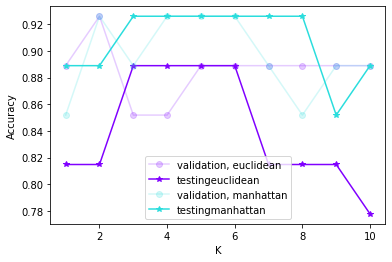

In [20]:
from matplotlib.pyplot import cm

# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[]]
valid_acc = [[],[]]
n_valid = y_train_va.shape[0]
best_acc = [[],[]]
best_valid_KK = [[],[]]
distance = [euclidean,manhattan]

for c in range(2):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(x_train_tr.values, y_train_tr.values)
      model.predict(x_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(2):
  for k in range(1,11):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = KNN(K=k,dist_fn = distance[c])
    model_best.fit(x_train.values, y_train.values)
    model_best.predict(x_test.values)
    model_best.evaluate(y_test, verbose=False)
    best_acc[c].append(model_best.accuracy)
    #best_valid_KK[c] = best_valid_K
    print(f' K = {k}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')

color = iter(cm.rainbow(np.linspace(0, 1, 4)))
for n in range(2):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__,alpha = 0.2)
  #c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing'+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")

plt.legend(loc='best')
#plt.title("K Accuracy for Hepatitis Data (Training/Validation)")
plt.savefig('Hepatitis_chooseK.png',dpi=300,bbox_inches='tight')


####Diabetes

K = 1, test accuracy = 0.5052631578947369, distance = euclidean
K = 2, test accuracy = 0.5157894736842106, distance = euclidean
K = 3, test accuracy = 0.5131578947368421, distance = euclidean
K = 4, test accuracy = 0.5078947368421053, distance = euclidean
K = 5, test accuracy = 0.5157894736842106, distance = euclidean
K = 6, test accuracy = 0.5105263157894737, distance = euclidean
K = 7, test accuracy = 0.5289473684210526, distance = euclidean
K = 8, test accuracy = 0.5263157894736842, distance = euclidean
K = 9, test accuracy = 0.5289473684210526, distance = euclidean
K = 10, test accuracy = 0.5289473684210526, distance = euclidean
K = 1, test accuracy = 0.5236842105263158, distance = manhattan
K = 2, test accuracy = 0.49473684210526314, distance = manhattan
K = 3, test accuracy = 0.5263157894736842, distance = manhattan
K = 4, test accuracy = 0.5052631578947369, distance = manhattan
K = 5, test accuracy = 0.5184210526315789, distance = manhattan
K = 6, test accuracy = 0.5131578947368

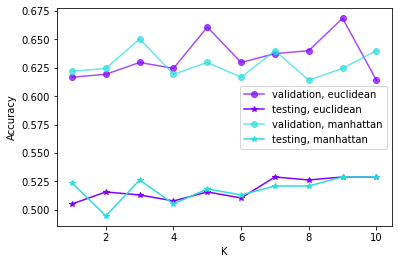

In [21]:
# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x2_train, y2_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[]]
valid_acc = [[],[]]
best_acc = [[],[]]
n_valid = y_train_va.shape[0]
#distance = [euclidean,manhattan]

for c in range(2):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(x_train_tr.values, y_train_tr.values)
      model.predict(x_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(2):
  for k in range(1,11):
    #best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = KNN(K=k,dist_fn = distance[c])
    model_best.fit(x_train.values, y_train.values)
    model_best.predict(x2_test.values)
    model_best.evaluate(y2_test, verbose=False)
    best_acc[c].append(model_best.accuracy)
    #best_valid_KK[c] = best_valid_K
    print(f'K = {k}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')



color = iter(cm.rainbow(np.linspace(0, 1, 4)))
for n in range(2):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__,alpha = 0.7)
  #c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.title("K Accuracy for Diabetes Data (Training/Validation)")
plt.savefig('Diabetes_chooseK.png',dpi=300,bbox_inches='tight')


##Predictions

In this section, I run predictions on the data sets using KNN with the calculated best K.

####Hepatitis

accuracy is 88.9.


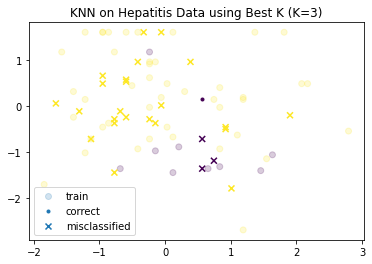

In [22]:
myK = 3

model = KNN(K = myK)
model.fit(x_train.values, y_train.values)
y_prob, knns = model.predict(x_test.values)
model.evaluate(y_test, verbose=False)
y_pred = np.argmax(y_prob,1)
accuracy = model.accuracy
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train.values[:,0], x_train.values[:,17], c=y_train.values, marker='o', alpha=.2, label='train')
plt.scatter(x_test.values[correct,0], x_test.values[correct,17], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test.values[incorrect,0], x_test.values[incorrect,17], marker='x', c=y_test[incorrect], label='misclassified')
plt.title("KNN on Hepatitis Data using Best K (K=3)")
plt.legend()

plt.show()

####Diabetes


accuracy is 61.1.


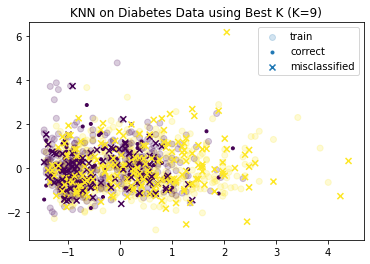

In [23]:
myK = 9

model = KNN(K = myK)
model.fit(x2_train.values, y2_train.values)
y_prob, knns = model.predict(x2_test.values)
model.evaluate(y2_test, verbose=False)
y2_pred = np.argmax(y_prob,1)
accuracy = model.accuracy
print(f'accuracy is {accuracy*100:.1f}.')

#visualization
correct = y2_test == y2_pred
incorrect = np.logical_not(correct)
plt.scatter(x2_train.values[:,2], x2_train.values[:,17], c=y2_train.values, marker='o', alpha=.2, label='train')
plt.scatter(x2_test.values[correct,2], x2_test.values[correct,17], marker='.', c=y2_pred[correct], label='correct')
plt.scatter(x2_test.values[incorrect,2], x2_test.values[incorrect,17], marker='x', c=y2_test[incorrect], label='misclassified')
plt.title("KNN on Diabetes Data using Best K (K=9)")
plt.legend()
plt.show()

##Decision Boundaries

In this section, I create a decision boundary using the 2 most correlated features of each data set with the target.

####Hepatitis

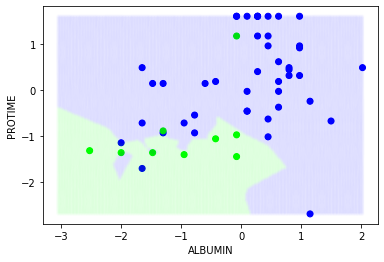

In [24]:
#choose K and initialize model
myK = 3
model = KNN(K=myK)
#code taken from tutorial
#index for different features 
#AGE:0,SEX:1,STEROID:2,ANTIVIRALS:3, FATIGUE:4, MALAISE:5, ANOREXIA:6, LIVER BIG:7, 
#LIVER FIRM:8, SPLEEN PALPABLE:9, SPIDERS:10,ASCITES:11,VARICES:12,BILIRUBIN:13, ALK PHOSPHATE:14, SGOT:15,
# ALBUMIN:16, PROTIME:17, HOSTOLOGY:18
#use protime(17) and alubmin(16) for new model
#use numbers to choose desired features
#features = [14,15]
features = [16,17]
x_train_mc = x_train[[x.columns[features[0]],x.columns[features[1]]]]
model.fit(x_train_mc.values, y_train.values)
#generate 2d grid
ALKpoints = np.linspace(np.min(x.values[:,features[0]]), np.max(x.values[:,features[0]]), 200)
SGOTpoints = np.linspace(np.min(x.values[:,features[1]]), np.max(x.values[:,features[1]]), 200)
p0,p1 = np.meshgrid(ALKpoints,SGOTpoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all, _ = model.predict(p_all)
#training values
y_train_prob,_ = model.predict(x_train_mc.values)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
y_pred_train = np.zeros_like(y_train_prob)
y_pred_train[np.arange(x_train_mc.values.shape[0]), np.argmax(y_train_prob, axis=-1)] = 1
#add a column to have 3 for c value(RGB)
N = y_pred_all.shape[0]
y_pred_all= np.c_[ np.zeros(N),y_pred_all ]
N2 = y_train_prob.shape[0]
y_train_prob= np.c_[ np.zeros(N2),y_pred_train ]
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
#plot 
plt.scatter(x_train_mc.values[:,0], x_train_mc.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.ylabel(x.columns[features[1]])
plt.xlabel(x.columns[features[0]])
plt.show()

####Diabetes

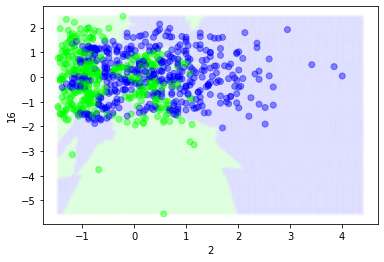

In [25]:
#choose K and initialize model
myK = 9
model = KNN(K=myK)
#code taken from tutorial
#0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
##1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
#2-7) The results of MA detection. Each feature value stand for the
#number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
#8-15) contain the same information as 2-7) for exudates. However,
#as exudates are represented by a set of points rather than the number of
#pixels constructing the lesions, these features are normalized by dividing the
#number of lesions with the diameter of the ROI to compensate different image
#sizes.
#16) The euclidean distance of the center of
#the macula and the center of the optic disc to provide important information
#regarding the patient's condition. This feature
#is also normalized with the diameter of the ROI.
#17) The diameter of the optic disc.
#18) The binary result of the AM/FM-based classification.
#19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.
#Dataset 2: messidor features.arff (Diabetic Retinopathy Debrecen dataset):
#use numbers to choose desired features
features = [2,16]
x2_train_mc = x2_train[[x2.columns[features[0]],x2.columns[features[1]]]]
model.fit(x2_train_mc.values, y2_train.values)
#generate 2d grid
ALKpoints = np.linspace(np.min(x2.values[:,features[0]]), np.max(x2.values[:,features[0]]), 200)
SGOTpoints = np.linspace(np.min(x2.values[:,features[1]]), np.max(x2.values[:,features[1]]), 200)
p0,p1 = np.meshgrid(ALKpoints,SGOTpoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all, _ = model.predict(p_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
#points for training data
y2_train_prob, _ = model.predict(x2_train_mc.values)
y2_pred_train = np.zeros_like(y2_train_prob)
y2_pred_train[np.arange(x2_train_mc.values.shape[0]), np.argmax(y2_train_prob, axis=-1)] = 1
#add a column to have 3 for c value(RGB)
N = y_pred_all.shape[0]
y_pred_all= np.c_[ np.zeros(N),y_pred_all ]
N2 = y2_pred_train.shape[0]
y2_pred_train= np.c_[ np.zeros(N2),y2_pred_train ]
y_train_prob = np.zeros((y2_train.shape[0], 3))
y_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
#plot 
plt.scatter(x2_train_mc.values[:,0], x2_train_mc.values[:,1], c=y2_pred_train, marker='o', alpha=0.4)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.ylabel(x2.columns[features[1]])
plt.xlabel(x2.columns[features[0]])
plt.show()

#Decision Tree


####Cost Function

In [26]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

###Decision Tree Class

In [27]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [28]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [29]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels)+1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

##Choice of Hyperparameter Max Tree Depth

Similar to my "Choice of Hyperparameter K" part of my KNN section, in this section, I further split the training data into training and validation data. I then run tests on multiple depths and distance functions to help find out what the best depth would be.

###Hepatitis


Max Depth = 1, test accuracy = 0.7407407407407407, cost = cost_misclassification
Max Depth = 2, test accuracy = 0.8148148148148148, cost = cost_misclassification
Max Depth = 3, test accuracy = 0.8148148148148148, cost = cost_misclassification
Max Depth = 4, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 5, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 6, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 7, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 8, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 9, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 10, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 11, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 12, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 13, test accu

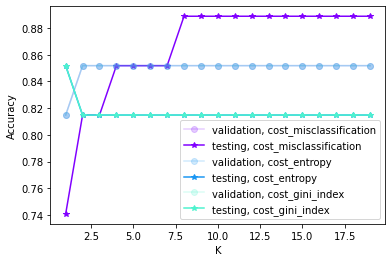

In [30]:
# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[],[]]
valid_acc = [[],[],[]]
n_valid = y_train_va.shape[0]
cost = [cost_misclassification,cost_entropy,cost_gini_index]
best_acc = [[],[],[]]
best_valid_md = [[],[],[]]
for n in range(3):
  for md in range(1,20):
      tree = DecisionTree(max_depth=md,cost_fn = cost[n])
      tree.fit(x_train_tr.values, y_train_tr.values)
      probs_test = tree.predict(x_train_va.values)
      y_pred = np.argmax(probs_test,1)
      accuracy = np.sum(y_pred == y_train_va)/y_train_va.shape[0]
      model_choices[n].append(md)
      valid_acc[n].append(accuracy)

# use the best K to predict test data
for c in range(3):
  for md in range(1,20):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = DecisionTree(max_depth=md,cost_fn=cost[c])
    model_best.fit(x_train.values, y_train.values)
    y_pred = model_best.predict(x_test.values)
    y_pred = np.argmax(y_pred,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    best_acc[c].append(accuracy)
    #best_valid_md[c] = best_valid_K
    print(f'Max Depth = {md}, test accuracy = {accuracy}, cost = {cost[c].__name__}')
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
for n in range(3):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+cost[n].__name__,alpha = 0.2)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+cost[n].__name__, )
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('Hepatitis_chooseMD.png',dpi=300,bbox_inches='tight')

###Diabetes

Max Depth = 1, test accuracy = 0.6269430051813472, cost = cost_misclassification
Max Depth = 2, test accuracy = 0.6295336787564767, cost = cost_misclassification
Max Depth = 3, test accuracy = 0.6217616580310881, cost = cost_misclassification
Max Depth = 4, test accuracy = 0.5958549222797928, cost = cost_misclassification
Max Depth = 5, test accuracy = 0.5958549222797928, cost = cost_misclassification
Max Depth = 6, test accuracy = 0.5880829015544041, cost = cost_misclassification
Max Depth = 7, test accuracy = 0.5803108808290155, cost = cost_misclassification
Max Depth = 8, test accuracy = 0.572538860103627, cost = cost_misclassification
Max Depth = 9, test accuracy = 0.5751295336787565, cost = cost_misclassification
Max Depth = 10, test accuracy = 0.5621761658031088, cost = cost_misclassification
Max Depth = 11, test accuracy = 0.5751295336787565, cost = cost_misclassification
Max Depth = 12, test accuracy = 0.5699481865284974, cost = cost_misclassification
Max Depth = 13, test accur

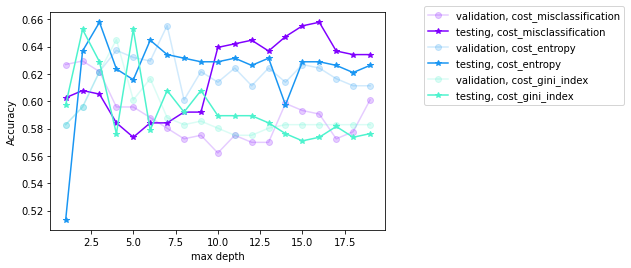

In [31]:
# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(x2_train, y2_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[],[]]
valid_acc = [[],[],[]]
n_valid = y_train_va.shape[0]
cost = [cost_misclassification,cost_entropy,cost_gini_index]
best_acc = [[],[],[]]
best_valid_md = [[],[],[]]
for n in range(3):
  for md in range(1,20):
      tree = DecisionTree(max_depth=md,cost_fn = cost[n])
      tree.fit(x_train_tr.values, y_train_tr.values)
      probs_test = tree.predict(x_train_va.values)
      y_pred = np.argmax(probs_test,1)
      accuracy = np.sum(y_pred == y_train_va)/y_train_va.shape[0]
      model_choices[n].append(md)
      print(f'Max Depth = {md}, test accuracy = {accuracy}, cost = {cost[n].__name__}')
      valid_acc[n].append(accuracy)

# use the best K to predict test data
for c in range(3):
  for md in range(1,20):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = DecisionTree(max_depth=md,cost_fn=cost[c])
    model_best.fit(x2_train.values, y2_train.values)
    y_pred = model_best.predict(x2_test.values)
    y_pred = np.argmax(y_pred,1)
    accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
    best_acc[c].append(accuracy)
    #best_valid_md[c] = best_valid_K
    #print(f'Max Depth = {md}, test accuracy = {accuracy}, cost = {cost[c].__name__}')
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
for n in range(3):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+cost[n].__name__,alpha = 0.2)
  #c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+cost[n].__name__)
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('Diabetes_chooseMD.png',dpi=300,bbox_inches='tight')


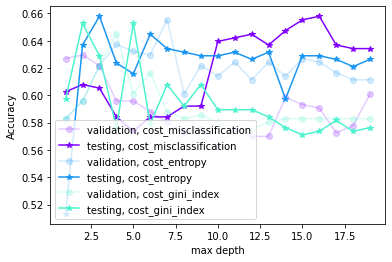

In [32]:
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
for n in range(3):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+cost[n].__name__,alpha = 0.2)
  #c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+cost[n].__name__)
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('Diabetes_chooseMD.png',dpi=300,bbox_inches='tight')

##Predictions

###Hepatitis

accuracy is 81.5.


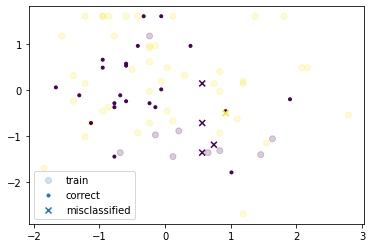

In [33]:
tree = DecisionTree(max_depth=2)
tree.fit(x_train.values, y_train.values)
probs_test = tree.predict(x_test.values)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train.values[:,0], x_train.values[:,17], c=y_train.values, marker='o', alpha=.2, label='train')
plt.scatter(x_test.values[correct,0], x_test.values[correct,17], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test.values[incorrect,0], x_test.values[incorrect,17], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

###Diabetes

accuracy is 63.4.


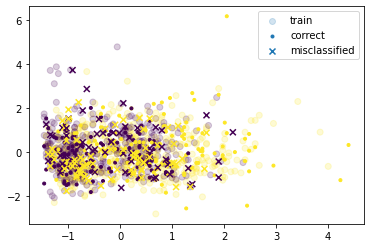

In [34]:
tree = DecisionTree(max_depth=7,cost_fn = cost_entropy)
tree.fit(x2_train.values, y2_train.values)
probs_test = tree.predict(x2_test.values)
y2_pred = np.argmax(probs_test,1)
accuracy = np.sum(y2_pred == y2_test)/y2_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y2_test == y2_pred
incorrect = np.logical_not(correct)
plt.scatter(x2_train.values[:,2], x2_train.values[:,17], c=y2_train.values, marker='o', alpha=.2, label='train')
plt.scatter(x2_test.values[correct,2], x2_test.values[correct,17], marker='.', c=y2_pred[correct], label='correct')
plt.scatter(x2_test.values[incorrect,2], x2_test.values[incorrect,17], marker='x', c=y2_test[incorrect], label='misclassified')
plt.legend()
plt.show()

##Decision Boundaries

###Hepatitis

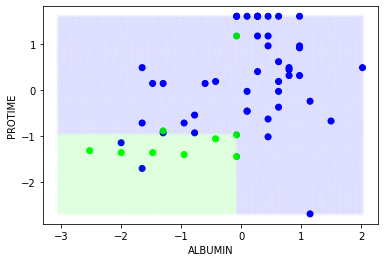

In [35]:
#choose max depth and initialize tree
mymd = 2
tree = DecisionTree(max_depth=mymd)
#code taken from tutorial
#index for different features 
#AGE:0,SEX:1,STEROID:2,ANTIVIRALS:3, FATIGUE:4, MALAISE:5, ANOREXIA:6, LIVER BIG:7, 
#LIVER FIRM:8, SPLEEN PALPABLE:9, SPIDERS:10,ASCITES:11,VARICES:12,BILIRUBIN:13, ALK PHOSPHATE:14, SGOT:15,
# ALBUMIN:16, PROTIME:17, HOSTOLOGY:18
#use protime(17) and alubmin(16) for new model
#use numbers to choose desired features
features = [16,17]
x_train_mc = x_train[[x.columns[features[0]],x.columns[features[1]]]]
tree.fit(x_train_mc.values, y_train.values)
#generate 2d grid
ALKpoints = np.linspace(np.min(x.values[:,features[0]]), np.max(x.values[:,features[0]]), 200)
SGOTpoints = np.linspace(np.min(x.values[:,features[1]]), np.max(x.values[:,features[1]]), 200)
p0,p1 = np.meshgrid(ALKpoints,SGOTpoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all = tree.predict(p_all)
#training values
y_train_prob = tree.predict(x_train_mc.values)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
y_pred_train = np.zeros_like(y_train_prob)
y_pred_train[np.arange(x_train_mc.values.shape[0]), np.argmax(y_train_prob, axis=-1)] = 1
#add a column to have 3 for c value(RGB)
#N = y_pred_all.shape[0]
#y_pred_all= np.c_[ np.zeros(N),y_pred_all ]
N2 = y_train_prob.shape[0]
y_train_prob= np.c_[ np.zeros(N2),y_pred_train ]
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
#plot 
plt.scatter(x_train_mc.values[:,0], x_train_mc.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.ylabel(x.columns[features[1]])
plt.xlabel(x.columns[features[0]])
plt.show()

###Diabetes

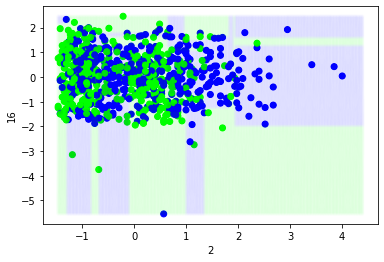

In [36]:
#choose max depth and initialize tree
mymd = 7
tree = DecisionTree(max_depth=mymd,cost_fn = cost_entropy)
#code taken from tutorial
#index for different features 
#0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
##1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
#2-7) The results of MA detection. Each feature value stand for the
#number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
#8-15) contain the same information as 2-7) for exudates. However,
#as exudates are represented by a set of points rather than the number of
#pixels constructing the lesions, these features are normalized by dividing the
#number of lesions with the diameter of the ROI to compensate different image
#sizes.
#16) The euclidean distance of the center of
#the macula and the center of the optic disc to provide important information
#regarding the patientâ€™s condition. This feature
#is also normalized with the diameter of the ROI.
#17) The diameter of the optic disc.
#18) The binary result of the AM/FM-based classification.
#19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.
#use numbers to choose desired features
features = [2,16]
x_train_mc = x2_train[[x2.columns[features[0]],x2.columns[features[1]]]]
tree.fit(x_train_mc.values, y2_train.values)
#generate 2d grid
ALKpoints = np.linspace(np.min(x2.values[:,features[0]]), np.max(x2.values[:,features[0]]), 200)
SGOTpoints = np.linspace(np.min(x2.values[:,features[1]]), np.max(x2.values[:,features[1]]), 200)
p0,p1 = np.meshgrid(ALKpoints,SGOTpoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all = tree.predict(p_all)
#training values
y_train_prob = tree.predict(x_train_mc.values)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
y_pred_train = np.zeros_like(y_train_prob)
y_pred_train[np.arange(x_train_mc.values.shape[0]), np.argmax(y_train_prob, axis=-1)] = 1
#add a column to have 3 for c value(RGB)
#N = y_pred_all.shape[0]
#y_pred_all= np.c_[ np.zeros(N),y_pred_all ]
N2 = y_train_prob.shape[0]
y_train_prob= np.c_[ np.zeros(N2),y_pred_train ]
y_train_prob = np.zeros((y2_train.shape[0], 3))
y_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
#plot 
plt.scatter(x_train_mc.values[:,0], x_train_mc.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.ylabel(x2.columns[features[1]])
plt.xlabel(x2.columns[features[0]])
plt.show()

# Above and Beyond

This section will include additional analysis to the base of this project. I explore several ideas that hopefully bring new information to the table.

## Numerical vs. Categorical Features
In this section, I isolate the numerical features and categorical features and run KNN on both to see if the results would be different.


### Hepatitis Data

#### Numerical Features

I isolate the numerical features in this section and run KNN with the standard continuous distance functions.

In [37]:
xnums = x[["AGE","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME"]]
xnums = xnums.astype("float");

print(f' instances (N) \t {xnums.shape[0]} \n features (D) \t {xnums.shape[1]} \n classes (C) \t {np.max(y)}')

# Now we split up the features and target into their respective training and testing data.
xnums_train, xnums_test, y_train, y_test = train_test_split(xnums, y, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 80 
 features (D) 	 6 
 classes (C) 	 2


best K = 3, test accuracy = 0.8888888888888888, distance = euclidean
best K = 3, test accuracy = 0.8888888888888888, distance = manhattan


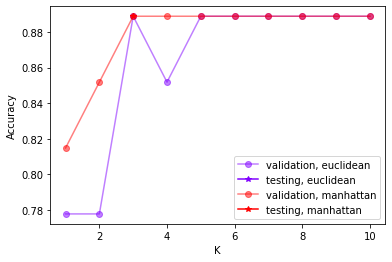

In [38]:
# further split the training data into 50% training and 50% validation
xnums_train_tr, xnums_train_va, y_train_tr, y_train_va = train_test_split(xnums_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[]]
valid_acc = [[],[]]
n_valid = y_train_va.shape[0]
distance = [euclidean,manhattan]

for c in range(2):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(xnums_train_tr.values, y_train_tr.values)
      model.predict(xnums_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(2):
  best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
  model_best = KNN(K=best_valid_K)
  model_best.fit(x_train.values, y_train.values)
  model_best.predict(x_test.values)
  model_best.evaluate(y_test, verbose=False)
  best_acc[c] = model_best.accuracy
  best_valid_KK[c] = best_valid_K
  print(f'best K = {best_valid_K}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')

color = iter(cm.rainbow(np.linspace(0, 1, 2)))
for n in range(2):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__,alpha = 0.5)
  plt.plot(best_valid_KK[n], best_acc[n], marker='*', color=c, label='testing, '+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('Hepatitis_chooseK.png',dpi=300,bbox_inches='tight')

#### Categorical Features
For the categorical features, I include results using the hamming distance on top of the results shown from the standard distances (euclidean and manhattan).

In [39]:
xcats = x[["SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE", "SPIDERS",\
            "ASCITES","VARICES","HISTOLOGY"]]
xcats = xcats.astype("int32");

print(f' instances (N) \t {xcats.shape[0]} \n features (D) \t {xcats.shape[1]} \n classes (C) \t {np.max(y)}')

# Now we split up the features and target into their respective training and testing data.
xcats_train, xcats_test, y_train, y_test = train_test_split(xcats, y, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 80 
 features (D) 	 13 
 classes (C) 	 2


best K = 9, test accuracy = 0.8518518518518519, distance = euclidean
best K = 9, test accuracy = 0.8518518518518519, distance = manhattan
best K = 3, test accuracy = 0.6666666666666666, distance = hamming


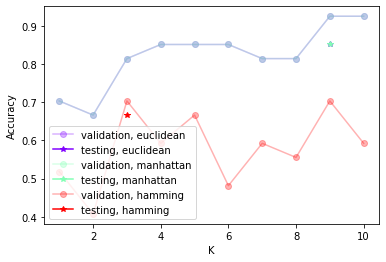

In [40]:
# further split the training data into 50% training and 50% validation
xcats_train_tr, xcats_train_va, y_train_tr, y_train_va = train_test_split(xcats_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[],[]]
valid_acc = [[],[],[]]
best_valid_KK = [[],[],[]]
best_acc = [[],[],[]]
n_valid = y_train_va.shape[0]
distance = [euclidean,manhattan,hamming]


for c in range(len(distance)):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(xcats_train_tr.values, y_train_tr.values)
      model.predict(xcats_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(len(distance)):
  best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
  model_best = KNN(K=best_valid_K, dist_fn = distance[c])
  model_best.fit(xcats_train_tr.values, y_train_tr.values)
  model_best.predict(xcats_test.values)
  model_best.evaluate(y_test, verbose=False)
  best_acc[c] = model_best.accuracy
  best_valid_KK[c] = best_valid_K
  print(f'best K = {best_valid_K}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')

color = iter(cm.rainbow(np.linspace(0, 1, 3)))

for n in range(len(distance)):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__, alpha = 0.3)
  plt.plot(best_valid_KK[n], best_acc[n], marker='*', color=c, label='testing, '+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.savefig('Hepatitis_chooseK.png',dpi=300,bbox_inches='tight')

## PCA
Here, I reduce the data into 2 dimensions.

###Hepatitis data proccessing

In [41]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'], index=x.index)

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,CLASS
5,-1.235596,0.017589,2
10,-1.513393,-0.046794,2
11,0.296017,1.631821,2
12,-0.435070,-0.395961,2
13,-1.034319,1.641275,2
...,...,...,...
139,-1.107707,-0.448883,2
143,1.133938,-1.108675,1
145,-0.214589,1.200497,2
153,0.286478,-1.467364,2


###Diabetes data proccessing

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x2)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'], index=x2.index)

finalDf2 = pd.concat([principalDf, y2], axis = 1)
finalDf2

,PC1,PC2,CLASS
0,-1.403752,-0.475475,1
1,-1.345717,-0.738475,1
2,2.263894,0.479736,2
3,1.803321,0.018259,1
4,1.115481,-1.031957,2
...,...,...,...
1146,0.302227,-1.389398,1
1147,1.621366,-0.450468,1
1148,1.567663,-1.175185,1
1149,-0.787503,0.251412,2


###Split data

In [43]:
# We first split the data into features and targets.
xpca, ypca = finalDf.drop(columns=['CLASS']), finalDf['CLASS']
(N,D), C = xpca.shape, np.max(y)

print(f' instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# Now we split up the features and target into their respective training and testing data.
xpca_train, xpca_test, y_train, y_test = train_test_split(xpca, ypca, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 80 
 features (D) 	 2 
 classes (C) 	 2


In [44]:
# We first split the data into features and targets.
xpca2, ypca2 = finalDf2.drop(columns=['CLASS']), finalDf2['CLASS']
(N,D), C = xpca2.shape, np.max(ypca2)

print(f' instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

# Now we split up the features and target into their respective training and testing data.
xpca2_train, xpca2_test, y2_train, y2_test = train_test_split(xpca2, ypca2, test_size = 0.33, random_state = 40, shuffle=True)

 instances (N) 	 1151 
 features (D) 	 2 
 classes (C) 	 2


###KNN

####Choice of Hyperparameter K

#####Hepatitis

 K = 1, test accuracy = 0.7407407407407407, distance = euclidean
 K = 2, test accuracy = 0.8518518518518519, distance = euclidean
 K = 3, test accuracy = 0.8888888888888888, distance = euclidean
 K = 4, test accuracy = 0.8518518518518519, distance = euclidean
 K = 5, test accuracy = 0.8888888888888888, distance = euclidean
 K = 6, test accuracy = 0.9259259259259259, distance = euclidean
 K = 7, test accuracy = 0.8518518518518519, distance = euclidean
 K = 8, test accuracy = 0.8888888888888888, distance = euclidean
 K = 9, test accuracy = 0.8518518518518519, distance = euclidean
 K = 10, test accuracy = 0.8518518518518519, distance = euclidean
 K = 1, test accuracy = 0.7407407407407407, distance = manhattan
 K = 2, test accuracy = 0.8518518518518519, distance = manhattan
 K = 3, test accuracy = 0.8148148148148148, distance = manhattan
 K = 4, test accuracy = 0.8888888888888888, distance = manhattan
 K = 5, test accuracy = 0.9259259259259259, distance = manhattan
 K = 6, test accuracy = 

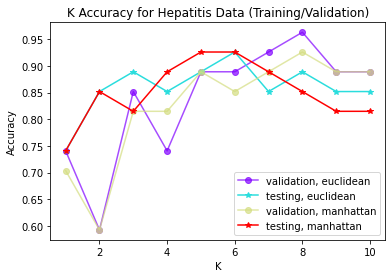

In [45]:
from matplotlib.pyplot import cm
# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(xpca_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[]]
valid_acc = [[],[]]
n_valid = y_train_va.shape[0]
best_acc = [[],[]]
best_valid_KK = [[],[]]
distance = [euclidean,manhattan]

for c in range(2):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(x_train_tr.values, y_train_tr.values)
      model.predict(x_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(2):
  for k in range(1,11):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = KNN(K=k,dist_fn = distance[c])
    model_best.fit(xpca_train.values, y_train.values)
    model_best.predict(xpca_test.values)
    model_best.evaluate(y_test, verbose=False)
    best_acc[c].append(model_best.accuracy)
    #best_valid_KK[c] = best_valid_K
    print(f' K = {k}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')

color = iter(cm.rainbow(np.linspace(0, 1, 4)))
for n in range(2):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__,alpha = 0.7)
  c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")

plt.legend(loc='best')
plt.title("K Accuracy for Hepatitis Data (Training/Validation)")
plt.savefig('Hepatitis_chooseK.png',dpi=300,bbox_inches='tight')


#####Diabetes

 K = 1, test accuracy = 0.5447368421052632, distance = euclidean
 K = 2, test accuracy = 0.5368421052631579, distance = euclidean
 K = 3, test accuracy = 0.5868421052631579, distance = euclidean
 K = 4, test accuracy = 0.5947368421052631, distance = euclidean
 K = 5, test accuracy = 0.5973684210526315, distance = euclidean
 K = 6, test accuracy = 0.6052631578947368, distance = euclidean
 K = 7, test accuracy = 0.5921052631578947, distance = euclidean
 K = 8, test accuracy = 0.6157894736842106, distance = euclidean
 K = 9, test accuracy = 0.6105263157894737, distance = euclidean
 K = 10, test accuracy = 0.6131578947368421, distance = euclidean
 K = 1, test accuracy = 0.5368421052631579, distance = manhattan
 K = 2, test accuracy = 0.5342105263157895, distance = manhattan
 K = 3, test accuracy = 0.5842105263157895, distance = manhattan
 K = 4, test accuracy = 0.6052631578947368, distance = manhattan
 K = 5, test accuracy = 0.6236842105263158, distance = manhattan
 K = 6, test accuracy = 

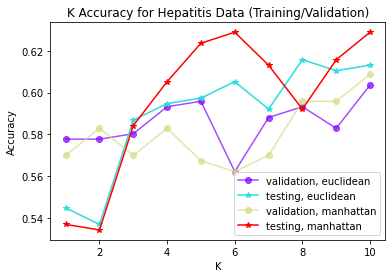

In [46]:
from matplotlib.pyplot import cm
# further split the training data into 50% training and 50% validation
x_train_tr, x_train_va, y_train_tr, y_train_va = train_test_split(xpca2_train, y2_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[]]
valid_acc = [[],[]]
n_valid = y_train_va.shape[0]
best_acc = [[],[]]
best_valid_KK = [[],[]]
distance = [euclidean,manhattan]

for c in range(2):
  for k in range(1,11):
      model = KNN(K = k,dist_fn = distance[c])
      model.fit(x_train_tr.values, y_train_tr.values)
      model.predict(x_train_va.values)
      model.evaluate(y_train_va,verbose=False)
      model_choices[c].append(k)
      valid_acc[c].append(model.accuracy)

# use the best K to predict test data
for c in range(2):
  for k in range(1,11):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = KNN(K=k,dist_fn = distance[c])
    model_best.fit(xpca2_train.values, y2_train.values)
    model_best.predict(xpca2_test.values)
    model_best.evaluate(y2_test, verbose=False)
    best_acc[c].append(model_best.accuracy)
    #best_valid_KK[c] = best_valid_K
    print(f' K = {k}, test accuracy = {model_best.accuracy}, distance = {distance[c].__name__}')

color = iter(cm.rainbow(np.linspace(0, 1, 4)))
for n in range(2):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+distance[n].__name__,alpha = 0.7)
  c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+distance[n].__name__)
plt.xlabel("K")
plt.ylabel("Accuracy")

plt.legend(loc='best')
plt.title("K Accuracy for Hepatitis Data (Training/Validation)")
plt.savefig('Diabetes_chooseK.png',dpi=300,bbox_inches='tight')


####Prediction

#####Hepatitis


The accuracy is 88.89%.
-----------------------
Correct guesses: 24/27
[29, 78, 104, 60, 53, 75, 77, 20, 48, 33, 85, 68, 5, 138, 103, 137, 84, 13, 54, 42, 17, 11, 139, 40]
Incorrect guesses: 3/27
[98, 62, 143]


,Predict,Actual
29,2,2
78,2,2
104,1,1
60,2,2
53,2,2
98,2,1
62,1,2
75,2,2
77,2,2
20,2,2


accuracy is 88.9.


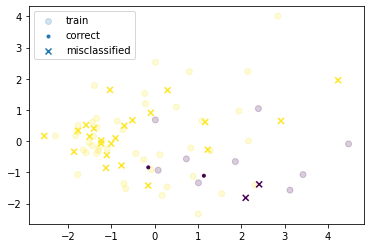

In [47]:
myK = 8

model = KNN(K = myK)
model.fit(xpca_train.values, y_train.values)
y_prob, knns = model.predict(xpca_test.values)
model.evaluate(y_test)
y_pred = np.argmax(y_prob,1)
accuracy = model.accuracy
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(xpca_train.values[:,0], xpca_train.values[:,1], c=y_train.values, marker='o', alpha=.2, label='train')
plt.scatter(xpca_test.values[correct,0], xpca_test.values[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(xpca_test.values[incorrect,0], xpca_test.values[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

#####Diabetes

accuracy is 61.3.


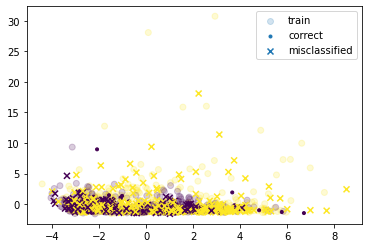

In [48]:
myK = 10

model = KNN(K = myK)
model.fit(xpca2_train.values, y2_train.values)
y_prob, knns = model.predict(xpca2_test.values)
model.evaluate(y2_test, verbose = False)
y2_pred = np.argmax(y_prob,1)
accuracy = model.accuracy
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y2_test == y2_pred
incorrect = np.logical_not(correct)
plt.scatter(xpca2_train.values[:,0], xpca2_train.values[:,1], c=y2_train.values, marker='o', alpha=.2, label='train')
plt.scatter(xpca2_test.values[correct,0], xpca2_test.values[correct,1], marker='.', c=y2_pred[correct], label='correct')
plt.scatter(xpca2_test.values[incorrect,0], xpca2_test.values[incorrect,1], marker='x', c=y2_test[incorrect], label='misclassified')
plt.legend()
plt.show()

####Decision Boundary

#####Hepatitis

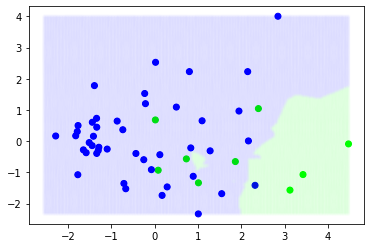

In [49]:
#choose K and initialize model
myK = 8
model = KNN(K=myK)
#code taken from tutorial
model.fit(xpca_train.values, y_train.values)
#generate 2d grid
xpoints = np.linspace(np.min(xpca.values[:,0]), np.max(xpca.values[:,0]), 200)
ypoints = np.linspace(np.min(xpca.values[:,1]), np.max(xpca.values[:,1]), 200)
p0,p1 = np.meshgrid(xpoints,ypoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all, _ = model.predict(p_all)
#training values
#y_train_prob,_ = model.predict(x_train.values)

y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
#add a column to have 3 for c value(RGB)
N = y_pred_all.shape[0]
y_pred_all= np.c_[ np.zeros(N),y_pred_all ]

y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
plt.scatter(xpca_train.values[:,0], xpca_train.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.show()

#####Diabetes

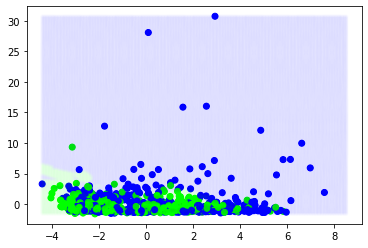

In [50]:
#choose K and initialize model (diabetes)
myK = 10
model = KNN(K=myK)
#code taken from tutorial
model.fit(xpca2_train.values, y2_train.values)

#generate 2D grid
ALKpoints = np.linspace(np.min(xpca2.values[:,0]), np.max(xpca2.values[:,0]), 200)
SGOTpoints = np.linspace(np.min(xpca2.values[:,1]), np.max(xpca2.values[:,1]), 200)
p0,p1 = np.meshgrid(ALKpoints,SGOTpoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all, _ = model.predict(p_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

#add a column to have 3 for c value(RGB)
N = y_pred_all.shape[0]
y_pred_all= np.c_[ np.zeros(N),y_pred_all ]
y2_train_prob = np.zeros((y2_train.shape[0], 3))
y2_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
plt.scatter(xpca2_train.values[:,0], xpca2_train.values[:,1], c=y2_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.show()

###Decision Tree

####Choice of Hyperparameter Max Tree Depth

#####Hepatitis

Max Depth = 1, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 2, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 3, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 4, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 5, test accuracy = 0.8888888888888888, cost = cost_misclassification
Max Depth = 6, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 7, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 8, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 9, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 10, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 11, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 12, test accuracy = 0.8518518518518519, cost = cost_misclassification
Max Depth = 13, test accu

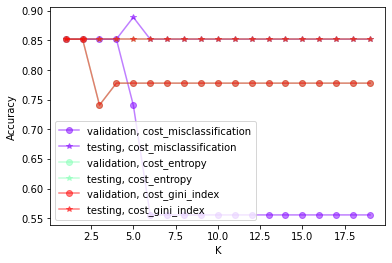

In [51]:
# further split the training data into 50% training and 50% validation
xpca_train_tr, xpca_train_va, y_train_tr, y_train_va = train_test_split(xpca_train, y_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[],[]]
valid_acc = [[],[],[]]
n_valid = y_train_va.shape[0]
cost = [cost_misclassification,cost_entropy,cost_gini_index]
best_acc = [[],[],[]]
best_valid_md = [[],[],[]]
for n in range(3):
  for md in range(1,20):
      tree = DecisionTree(max_depth=md,cost_fn = cost[n])
      tree.fit(xpca_train_tr.values, y_train_tr.values)
      probs_test = tree.predict(xpca_train_va.values)
      y_pred = np.argmax(probs_test,1)
      accuracy = np.sum(y_pred == y_train_va)/y_train_va.shape[0]
      model_choices[n].append(md)
      valid_acc[n].append(accuracy)

# use the best K to predict test data
for c in range(3):
  for md in range(1,20):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = DecisionTree(max_depth=md,cost_fn=cost[c])
    model_best.fit(xpca_train.values, y_train.values)
    y_pred = model_best.predict(x_test.values)
    y_pred = np.argmax(y_pred,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    best_acc[c].append(accuracy)
    #best_valid_md[c] = best_valid_K
    print(f'Max Depth = {md}, test accuracy = {accuracy}, cost = {cost[c].__name__}')
color = iter(cm.rainbow(np.linspace(0, 1, 3)))
for n in range(3):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+cost[n].__name__,alpha = 0.5)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+cost[n].__name__, alpha = 0.5)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('Hepatitis_chooseMD.png',dpi=300,bbox_inches='tight')

#####Diabetes

Max Depth = 1, test accuracy = 0.6026315789473684, cost = cost_misclassification
Max Depth = 2, test accuracy = 0.6078947368421053, cost = cost_misclassification
Max Depth = 3, test accuracy = 0.6052631578947368, cost = cost_misclassification
Max Depth = 4, test accuracy = 0.5842105263157895, cost = cost_misclassification
Max Depth = 5, test accuracy = 0.5736842105263158, cost = cost_misclassification
Max Depth = 6, test accuracy = 0.5842105263157895, cost = cost_misclassification
Max Depth = 7, test accuracy = 0.5842105263157895, cost = cost_misclassification
Max Depth = 8, test accuracy = 0.5921052631578947, cost = cost_misclassification
Max Depth = 9, test accuracy = 0.5921052631578947, cost = cost_misclassification
Max Depth = 10, test accuracy = 0.6394736842105263, cost = cost_misclassification
Max Depth = 11, test accuracy = 0.6421052631578947, cost = cost_misclassification
Max Depth = 12, test accuracy = 0.6447368421052632, cost = cost_misclassification
Max Depth = 13, test accu

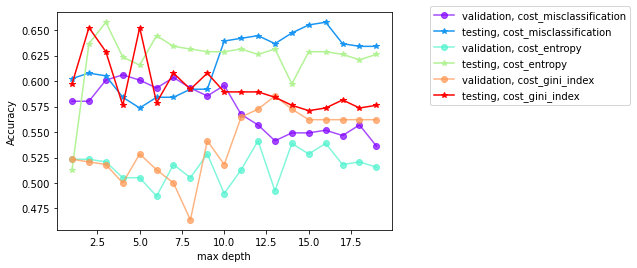

In [52]:
# further split the training data into 50% training and 50% validation
xpca2_train_tr, xpca2_train_va, y_train_tr, y_train_va = train_test_split(xpca2_train, y2_train, test_size = 0.50, random_state = 42, shuffle=True)
model_choices = [[],[],[]]
valid_acc = [[],[],[]]
n_valid = y_train_va.shape[0]
cost = [cost_misclassification,cost_entropy,cost_gini_index]
best_acc = [[],[],[]]
best_valid_md = [[],[],[]]
for n in range(3):
  for md in range(1,20):
      tree = DecisionTree(max_depth=md,cost_fn = cost[n])
      tree.fit(xpca2_train_tr.values, y_train_tr.values)
      probs_test = tree.predict(xpca2_train_va.values)
      y_pred = np.argmax(probs_test,1)
      accuracy = np.sum(y_pred == y_train_va)/y_train_va.shape[0]
      model_choices[n].append(md)
      valid_acc[n].append(accuracy)

# use the best K to predict test data
for c in range(3):
  for md in range(1,20):
    best_valid_K = model_choices[c][valid_acc[c].index(max(valid_acc[c]))]
    model_best = DecisionTree(max_depth=md,cost_fn=cost[c])
    model_best.fit(x2_train.values, y2_train.values)
    y_pred = model_best.predict(x2_test.values)
    y_pred = np.argmax(y_pred,1)
    accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
    best_acc[c].append(accuracy)
    #best_valid_md[c] = best_valid_K
    print(f'Max Depth = {md}, test accuracy = {accuracy}, cost = {cost[c].__name__}')
color = iter(cm.rainbow(np.linspace(0, 1, 6)))
for n in range(3):
  c = next(color)
  plt.plot(model_choices[n], valid_acc[n], marker='o', color=c, label='validation, '+cost[n].__name__,alpha = 0.7)
  c = next(color)
  plt.plot(model_choices[n], best_acc[n], marker='*', color=c, label='testing, '+cost[n].__name__)
plt.xlabel("max depth")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('Diabetes_chooseMD.png',dpi=300,bbox_inches='tight')


####Predictions


#####Hepatitis

accuracy is 81.5.


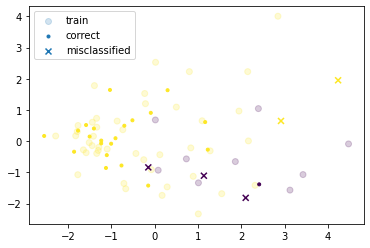

In [53]:
tree = DecisionTree(max_depth=2,cost_fn =cost_misclassification )
tree.fit(xpca_train.values, y_train.values)
probs_test = tree.predict(xpca_test.values)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(xpca_train.values[:,0], xpca_train.values[:,1], c=y_train.values, marker='o', alpha=.2, label='train')
plt.scatter(xpca_test.values[correct,0], xpca_test.values[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(xpca_test.values[incorrect,0], xpca_test.values[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

#####Diabetes

accuracy is 60.0.


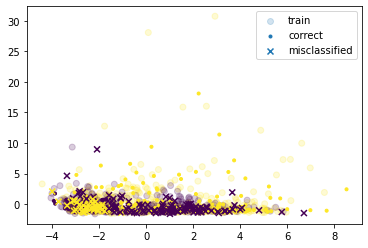

In [54]:
tree = DecisionTree(max_depth=4,cost_fn = cost_misclassification)
tree.fit(xpca2_train.values, y2_train.values)
probs_test = tree.predict(xpca2_test.values)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y2_test)/y2_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y2_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(xpca2_train.values[:,0], xpca2_train.values[:,1], c=y2_train.values, marker='o', alpha=.2, label='train')
plt.scatter(xpca2_test.values[correct,0], xpca2_test.values[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(xpca2_test.values[incorrect,0], xpca2_test.values[incorrect,1], marker='x', c=y2_test[incorrect], label='misclassified')
plt.legend()
plt.show()

####Decision Boundary

#####Hepatitis


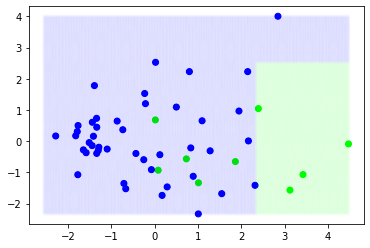

In [55]:
#choose K and initialize model
myK = 8
model = DecisionTree(max_depth=2,cost_fn =cost_misclassification )
#code taken from tutorial
model.fit(xpca_train.values, y_train.values)
#generate 2d grid
xpoints = np.linspace(np.min(xpca.values[:,0]), np.max(xpca.values[:,0]), 200)
ypoints = np.linspace(np.min(xpca.values[:,1]), np.max(xpca.values[:,1]), 200)
p0,p1 = np.meshgrid(xpoints,ypoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all = model.predict(p_all)
#training values

y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
plt.scatter(xpca_train.values[:,0], xpca_train.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.show()

#####Diabetes

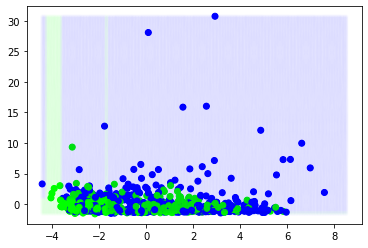

In [56]:
#choose K and initialize model
mymd = 4
model = DecisionTree(max_depth=mymd)
#code taken from tutorial
model.fit(xpca2_train.values, y2_train.values)
#generate 2d grid
xpoints = np.linspace(np.min(xpca2.values[:,0]), np.max(xpca2.values[:,0]), 200)
ypoints = np.linspace(np.min(xpca2.values[:,1]), np.max(xpca2.values[:,1]), 200)
p0,p1 = np.meshgrid(xpoints,ypoints)
p_all = np.vstack((p0.ravel(),p1.ravel())).T
#prediction of 2D grid
y_prob_all= model.predict(p_all)

#training values
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(p_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((y2_train.shape[0], 3))
y_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
plt.scatter(xpca2_train.values[:,0], xpca2_train.values[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(p_all[:,0], p_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.show()

In [57]:
y_pred_all

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Precision-Recall Curve
I use a precision-recall curve to more accurately gauge the quality of the models on specfically the hepatitis data set. I do so because after cleaning, the hepatitis data ends up being quite imbalanced.

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 40, shuffle=True)
myK = 3
model = KNN(K = myK)
model.fit(x_train.values, y_train.values)
y_prob, knns = model.predict(x_test.values)
model.evaluate(y_test, verbose=False)

# Get the confusion matrix
y_compare = pd.DataFrame(data=np.vstack((model.y_pred,y_test)).T, index=y_test.index, columns=["Predict","Actual"])
conf_matrix =  pd.crosstab(y_compare['Actual'], y_compare['Predict'], rownames=['Actual'], colnames=['Predicted'])
conf_matrix_array = conf_matrix.values

print(conf_matrix)

Predicted  1   2
Actual          
1          3   1
2          2  21


For K = 3:
precision = 0.9545454545454546
recall = 0.9130434782608695
f1 score = 0.9333333333333332

Precision-Recall Curve
----------------------
AUC = 0.9708315034401991


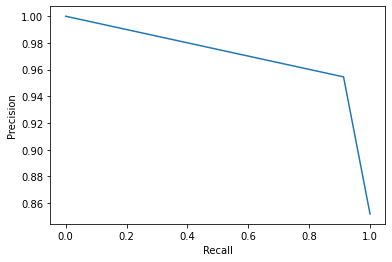

In [59]:
y_test_binary = y_test.copy() - 1;
y_pred_binary = model.y_pred.copy() - 1;

#calculate precision, recall, and f1
tp = conf_matrix_array[1][1]
fp = conf_matrix_array[0][1]
tn = conf_matrix_array[0][0]
fn = conf_matrix_array[1][0]
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = f1_score(y_test_binary, y_pred_binary)

precisions, recalls, _ = precision_recall_curve(y_test_binary, y_pred_binary)
disp = PrecisionRecallDisplay(precision = precisions, recall = recalls)

# print info:
print(f"For K = 3:")
print(f"precision = {precision}\nrecall = {recall}\nf1 score = {f1}\n")
print("Precision-Recall Curve\n----------------------")
disp.plot(drawstyle="default")
print(f"AUC = {auc(recalls, precisions)}")